In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm


pd.set_option('display.max_columns', None)



In [110]:
import json

with open('column_dtypes.json', 'r') as f:
    column_dtypes = json.load(f)

# Remove 'day' from column_dtypes and handle it separately with parse_dates
column_dtypes.pop('day', None)

column_dtypes

{'order_id': 'object',
 'billing_city': 'object',
 'customer_id': 'object',
 'product_id': 'object',
 'product_price': 'float64',
 'product_title': 'object',
 'product_type': 'object',
 'variant_id': 'object',
 'variant_sku': 'object',
 'variant_title': 'object',
 'api_client_title': 'object',
 'shipping_city': 'object',
 'market_name': 'object',
 'purchase_option': 'object',
 'cancelled': 'object',
 'cost_tracked': 'object',
 'financial_status': 'object',
 'order_name': 'object',
 'sale_kind': 'object',
 'billing_region': 'object',
 'billing_country': 'object',
 'customer_type': 'object',
 'customer_cohort_month': 'object',
 'customer_cohort_quarter': 'object',
 'referrer_url': 'object',
 'referrer_host': 'object',
 'referring_channel': 'object',
 'referring_platform': 'object',
 'marketing_event_target': 'object',
 'marketing_event_type': 'object',
 'adjustment': 'object',
 'total_sales': 'float64',
 'discounts': 'float64',
 'orders': 'int64',
 'customers': 'int64',
 'net_quantity': 

In [111]:
df = pd.read_csv('sales_clean.csv', dtype=column_dtypes, parse_dates=['day'])
df.sample(10)


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,unit_price,discount_percentage,discount_rate,discount_round,year,month,day_of_month
5341,2021-03-15,3683661545627,Elm Grove,5073064394907,6306570567,139.0,Balloon Over Paris Bridge,Gift Collection,32493118914698,NaN,Black,Online Store,Elm Grove,United States,One-time,No,No,paid,#3094,order,Wisconsin,United States,First-time,2021-03,2021-01,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,No,139.0,0.0,1,1,1,1,139.00,139.00,0.0,0.0,0.00,1,139.00,139.0,0.0,0.0,0.0,2021,3,15
3706,2021-01-30,3051880874139,Clayton,4519542063259,4973512523914,49.0,Medical Superhero F,Mini,33582707900554,NaN,Black,Online Store,Clayton,United States,One-time,No,No,refunded,#2421,order,California,United States,First-time,2021-01,2021-01,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,No,39.2,-9.8,1,1,1,1,49.00,39.20,0.0,0.0,0.00,1,39.20,49.0,20.0,0.2,20.0,2021,1,30
7191,2021-05-23,3851774460059,Shakerheights,5262824472731,6202345927,139.0,Shalom,Gift Collection,32493286654090,NaN,White,Online Store,Beverly Hills,United States,One-time,No,No,paid,#3914,order,Ohio,United States,First-time,2021-05,2021-04,https://www.jeanpierreweill.com/collections/gi...,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,139.0,0.0,1,1,1,1,139.00,139.00,0.0,0.0,0.00,1,139.00,139.0,0.0,0.0,0.0,2021,5,23
8727,2021-11-14,4571561820390,Houston,5962225844454,6848885522587,10.0,Hand-written personalization inside your painting,NaN,40289823654043,NaN,NaN,Online Store,Houston,United States,One-time,No,No,paid,#4533,order,Texas,United States,First-time,2021-11,2021-10,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,40.0,0.0,1,1,4,4,40.00,40.00,0.0,0.0,0.00,4,40.00,2.5,0.0,0.0,0.0,2021,11,14
8687,2021-11-13,4570883457254,Rensselaer,5918842519782,0,0.0,NaN,NaN,0,NaN,NaN,Online Store,Rensselaer,United States,One-time,No,No,paid,#4527,order,New York,United States,Returning,2021-11,2021-10,NaN,NaN,direct,direct,NaN,NaN,No,0.0,0.0,0,0,0,0,0.00,0.00,0.0,0.0,0.00,0,0.00,NaN,NaN,NaN,NaN,2021,11,13
11836,2023-11-27,5522124964070,Buffalo Grove,7478933913830,4612036624522,151.2,Jerusalem Prayer,Gift Collection,32492898451594,PCjerusB,Black,Online Store,Modiin,International,One-time,No,No,paid,5649,order,Illinois,United States,Returning,2023-09,2023-07,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,151.2,0.0,1,1,1,1,129.23,129.23,0.0,0.0,21.97,1,129.23,151.2,0.0,0.0,0.0,2023,11,27
5245,2021-03-13,3679654051995,Bowling Green,4349041803419,4826652835978,49.0,Whale,NaN,33259816681610,NaN,white,Online Store,Bowling Green,United States,One-time,No,No,paid,#3068,order,Ohio,United States,Returning,2020-12,2020-10,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,49.0,0.0,1,1,1,1,49.00,49.00,0.0,0.0,0.00,1,49.00,49.0,0.0,0.0,0.0,2021,3,13
8762,2021-11-15,4574582866150,Houston,5574905790619,4826366673034,49.0,Together,Mini,33258994925706,NaN,Black,Online Store,Houston,United States,One-time,No,No,paid,#4548,order,Texas,United States,Returning,2021-09,2021-07,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,98.0,0.0,1,1,2,2,98.00,98.00,0.0,0.0,0.00,2,98.00,24.5,0.0,0.0,0.0,2021,11,15
11344,2023-06-22,5320561066214,Eschweiler,4282488914075,8226437955814,370.0,Your favorite Petite 4x larger,NaN,43800461508838,NaN,NaN,Online Store,Eschweiler,International,One-time,No,No,paid,5481,order,NaN,Germany,Returning,2020-11,2020-10,NaN,NaN,ssw,ssw,NaN,NaN,No,370.0,0.0,1,1

In [112]:
dfs = df[df.product_id != '0']
dfs


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,unit_price,discount_percentage,discount_rate,discount_round,year,month,day_of_month
5,2018-09-28,613689163828,Gilbert,734368038964,6203234119,100.0,City Overlook,Gift Collection,19742441671,NaN,NaN,Online Store,Gilbert,United States,One-time,No,No,paid,#1135,order,Arizona,United States,First-time,2018-09,2018-07,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,100.0,0.000000,0.000000,0.0,2018,9,28
10,2018-10-02,616200765492,Taipa,736557793332,6203205511,100.0,Bird Cage,Gift Collection,20502905031,NaN,NaN,Online Store,Taipa,International,One-time,No,No,paid,#1136,order,NaN,Macao,First-time,2018-10,2018-10,https://www.jeanpierreweill.com/collections/gi...,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,100.0,0.000000,0.000000,0.0,2018,10,2
13,2018-10-04,617671426100,White Marsh,739204300852,6306587911,120.0,Jazz Ensemble,Gift Collection,20133536839,NaN,NaN,Online Store,Gloucester,United States,One-time,No,No,paid,#1137,order,Virginia,United States,First-time,2018-10,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,120.0,0.000000,0.000000,0.0,2018,10,4
53,2018-11-11,643194716212,East Palatka,6421963796,6179810823,120.0,Moonlight Dance,Gift Collection,19682720775,NaN,NaN,Online Store,East Palatka,United States,One-time,No,No,paid,#1138,order,Florida,United States,First-time,2018-11,2018-10,https://www.bing.com/search,www.bing.com,bing,microsoft,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,120.0,0.000000,0.000000,0.0,2018,11,11
55,2018-11-13,644933124148,Fayetteville,865021722676,6203242823,120.0,Men Raining,Gift Collection,19742477767,NaN,NaN,Online Store,Fayetteville,United States,One-time,No,No,paid,#1139,order,Arkansas,United States,First-time,2018-11,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,83.0,-37.0,1,1,1,1,120.0,83.0,0.0,0.0,0.0,1,83.0,120.0,30.833333,0.308333,30.0,2018,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13414,2024-09-24,5971497451750,Denver,7524697374950,7030027649179,289.0,Limitless,Classique,41157664702619,CClimitB,NaN,Online Store,Denver,United States,One-time,No,No,paid,6263,order,Colorado,United States,Returning,2023-11,2023-10,https://www.jeanpierreweill.com/collections/cl...,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,289.0,0.0,1,1,1,1,289.0,289.0,0.0,0.0,0.0,1,289.0,289.0,0.000000,0.000000,0.0,2024,9,24
13417,2024-09-24,5971556303078,Glebe,6370217033958,7766198321382,189.0,Birthday Celebration,Gift Collection,42873256444134,NaN,Black / 10 x 8 inches,Online Store,Glebe,International,One-time,No,No,paid,6264,order,New South Wales,Australia,Returning,2022-07,2022-07,https://www.jeanpierreweill.com/cart,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,189.0,0.0,1,1,1,1,189.0,189.0,0.0,0.0,0.0,1,189.0,189.0,0.000000,0.000000,0.0,2024,9,24
13419,2024-09-26,5973918580966,Santiago,8258676523238,4600669896842,189.0,Kotel,Gift Collection,32493256441994,PCkotelB,Black / 10 x 8 inches,Online Store,Santiago,International,One-time,No,No,paid,6265,order,Santiago,Chile,First-time,2024-09,2024-07,https:

In [113]:
df.day = pd.to_datetime(df.day)


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13425 entries, 0 to 13424
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   day                      13425 non-null  datetime64[ns]
 1   order_id                 13425 non-null  object        
 2   billing_city             12420 non-null  object        
 3   customer_id              13425 non-null  object        
 4   product_id               13425 non-null  object        
 5   product_price            13425 non-null  float64       
 6   product_title            7198 non-null   object        
 7   product_type             6072 non-null   object        
 8   variant_id               13425 non-null  object        
 9   variant_sku              1664 non-null   object        
 10  variant_title            6736 non-null   object        
 11  api_client_title         12420 non-null  object        
 12  shipping_city            12398 n

### USA

In [115]:
usa = df[df['billing_country'] == 'United States']
usa.head()

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,unit_price,discount_percentage,discount_rate,discount_round,year,month,day_of_month
5,2018-09-28,613689163828,Gilbert,734368038964,6203234119,100.0,City Overlook,Gift Collection,19742441671,NaN,NaN,Online Store,Gilbert,United States,One-time,No,No,paid,#1135,order,Arizona,United States,First-time,2018-09,2018-07,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,100.0,0.0,0.0,0.0,2018,9,28
6,2018-09-28,613689163828,Gilbert,734368038964,0,0.0,NaN,NaN,0,NaN,NaN,Online Store,Gilbert,United States,One-time,No,No,paid,#1135,order,Arizona,United States,First-time,2018-09,2018-07,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,2018,9,28
13,2018-10-04,617671426100,White Marsh,739204300852,6306587911,120.0,Jazz Ensemble,Gift Collection,20133536839,NaN,NaN,Online Store,Gloucester,United States,One-time,No,No,paid,#1137,order,Virginia,United States,First-time,2018-10,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,120.0,0.0,0.0,0.0,2018,10,4
14,2018-10-04,617671426100,White Marsh,739204300852,0,0.0,NaN,NaN,0,NaN,NaN,Online Store,Gloucester,United States,One-time,No,No,paid,#1137,order,Virginia,United States,First-time,2018-10,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,2018,10,4
52,2018-11-11,643194716212,East Palatka,6421963796,0,0.0,NaN,NaN,0,NaN,NaN,Online Store,East Palatka,United States,One-time,No,No,paid,#1138,order,Florida,United States,First-time,2018-11,2018-10,https://www.bing.com/search,www.bing.com,bing,microsoft,NaN,NaN,No,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,2018,11,11


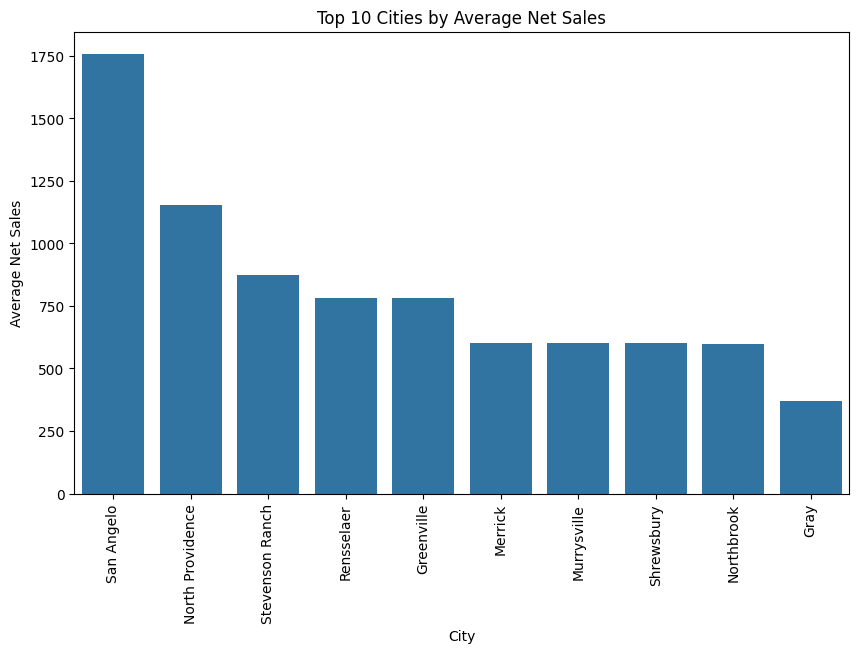

In [116]:
avg_net_sales_by_city = usa.groupby('billing_city')['net_sales'].mean().reset_index()
avg_net_sales_by_city = avg_net_sales_by_city.rename(columns={'net_sales': 'avg_net_sales'})
top_10_avg_net_sales_by_city = avg_net_sales_by_city.sort_values(by='avg_net_sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='billing_city', y='avg_net_sales', data=top_10_avg_net_sales_by_city)
plt.xticks(rotation=90)
plt.title('Top 10 Cities by Average Net Sales')
plt.xlabel('City')
plt.ylabel('Average Net Sales')
plt.show()


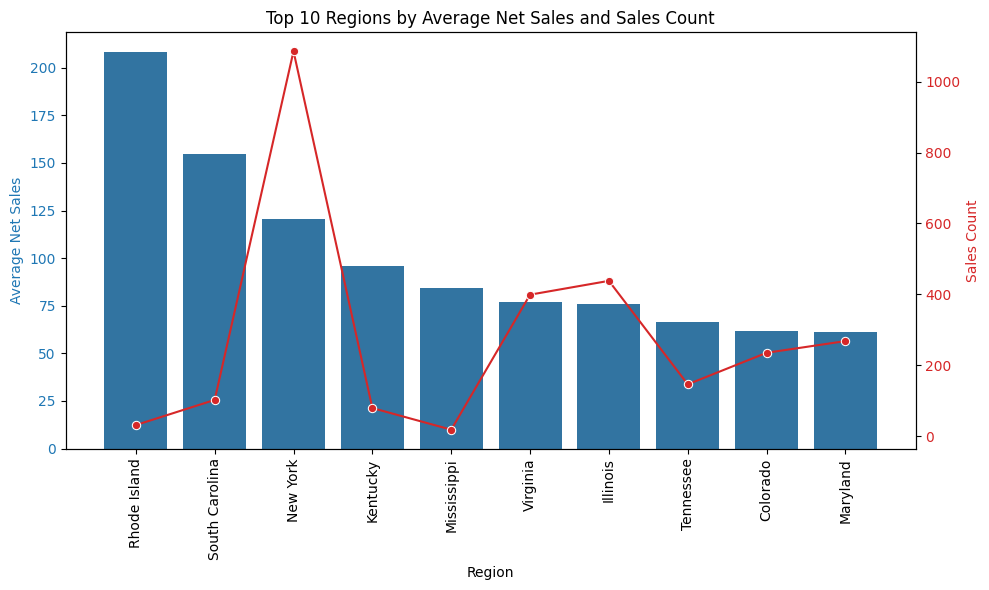

In [117]:
avg_net_sales_by_city = usa.groupby('billing_region')['net_sales'].mean().reset_index()
avg_net_sales_by_city = avg_net_sales_by_city.rename(columns={'net_sales': 'avg_net_sales'})
sales_count_by_region = usa.groupby('billing_region')['order_id'].count().reset_index()
sales_count_by_region = sales_count_by_region.rename(columns={'order_id': 'sales_count'})

combined_data = pd.merge(avg_net_sales_by_city, sales_count_by_region, on='billing_region')
top_10_combined_data = combined_data.sort_values(by='avg_net_sales', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Region')
ax1.set_ylabel('Average Net Sales', color=color)
sns.barplot(x='billing_region', y='avg_net_sales', data=top_10_combined_data, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Sales Count', color=color)
sns.lineplot(x='billing_region', y='sales_count', data=top_10_combined_data, ax=ax2, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Top 10 Regions by Average Net Sales and Sales Count')
fig.tight_layout()
plt.show()

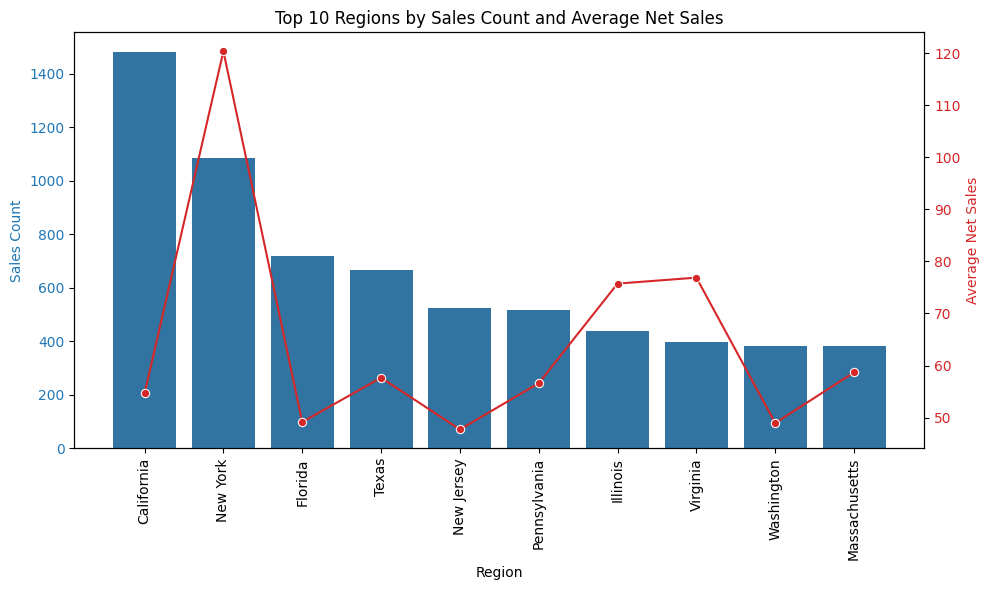

In [118]:
sales_count_by_region = usa.groupby('billing_region')['order_id'].count().reset_index()
sales_count_by_region = sales_count_by_region.rename(columns={'order_id': 'sales_count'})
avg_net_sales_by_region = usa.groupby('billing_region')['net_sales'].mean().reset_index()
avg_net_sales_by_region = avg_net_sales_by_region.rename(columns={'net_sales': 'avg_net_sales'})

combined_data = pd.merge(sales_count_by_region, avg_net_sales_by_region, on='billing_region')
top_10_combined_data = combined_data.sort_values(by='sales_count', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Region')
ax1.set_ylabel('Sales Count', color=color)
sns.barplot(x='billing_region', y='sales_count', data=top_10_combined_data, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Net Sales', color=color)
sns.lineplot(x='billing_region', y='avg_net_sales', data=top_10_combined_data, ax=ax2, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Top 10 Regions by Sales Count and Average Net Sales')
fig.tight_layout()
plt.show()


### Clients

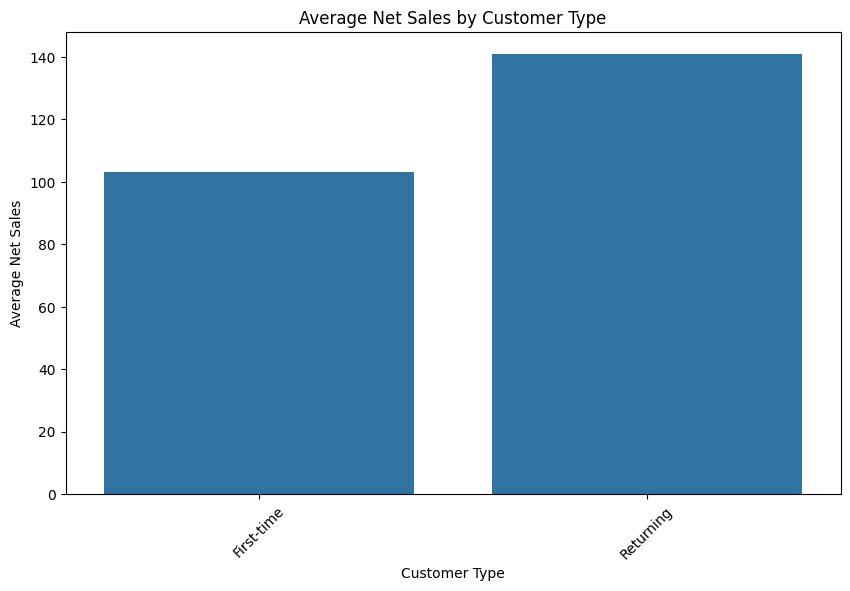

In [119]:
avg_net_sales_by_customer_type = dfs.groupby('customer_type')['net_sales'].mean().reset_index()
avg_net_sales_by_customer_type = avg_net_sales_by_customer_type.rename(columns={'net_sales': 'avg_net_sales'})

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='customer_type', y='avg_net_sales', data=avg_net_sales_by_customer_type, ax=ax)
plt.xlabel('Customer Type')
plt.ylabel('Average Net Sales')
plt.title('Average Net Sales by Customer Type')
plt.xticks(rotation=45)
plt.show()


In [120]:
# Distribution of number of purchases by the same client

# Group by customer_id and count the number of purchases
purchases_by_client = dfs.groupby('customer_id').size().sort_values(ascending=False).reset_index(name='purchase_count')
purchases_by_client.head()


,customer_id,purchase_count
0,5918842519782,57
1,4558712570011,23
2,4552995242139,22
3,5904334651622,20
4,6077184278758,19


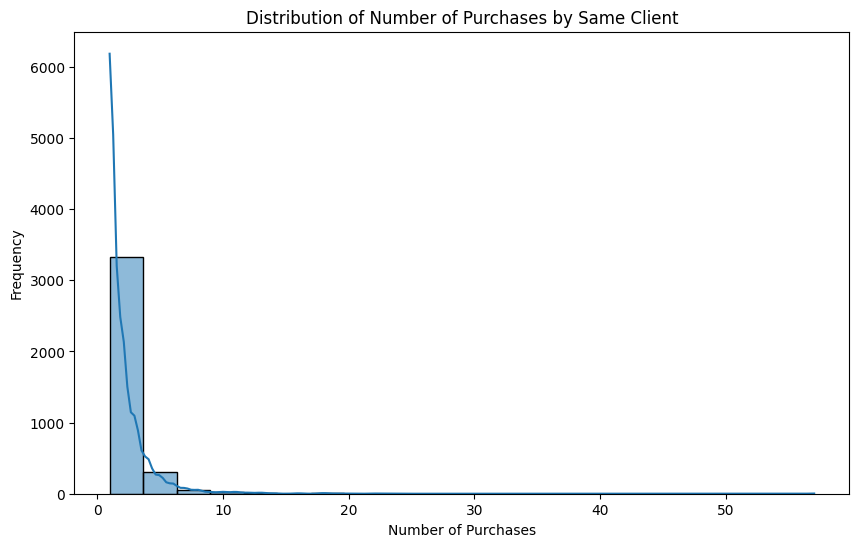

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution using seaborn with kde
plt.figure(figsize=(10, 6))
sns.histplot(purchases_by_client['purchase_count'], bins=len(purchases_by_client['purchase_count'].unique()), kde=True)
plt.title('Distribution of Number of Purchases by Same Client')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()


In [122]:
purchases_by_client['purchase_count'].unique()

array([57, 23, 22, 20, 19, 18, 16, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,
        4,  3,  2,  1])

In [123]:
int(purchases_by_client['purchase_count'].max())

57

In [124]:
import plotly.express as px

# Plot the distribution using plotly
fig = px.histogram(purchases_by_client, x='purchase_count', nbins=int(purchases_by_client['purchase_count'].max()), marginal="rug", title='Distribution of Number of Purchases by Same Client')
fig.update_layout(
    xaxis_title='Number of Purchases',
    yaxis_title='Frequency',
    bargap=0.2
)
fig.show()

In [125]:
returning = dfs[df.customer_type == 'Returning']
returning.head()


C:\Users\Vlad\AppData\Local\Temp\ipykernel_9456\2762348896.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,unit_price,discount_percentage,discount_rate,discount_round,year,month,day_of_month
129,2019-01-05,692876410932,Brooklyn,6908542868,6306615303,120.0,Tree of Life,Gift Collection,20133568391,NaN,NaN,Online Store,Brooklyn,United States,One-time,No,No,paid,#1150,order,New York,United States,Returning,2017-08,2017-07,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,108.00,-12.00,1,1,1,1,120.0,108.00,0.0,0.0,0.0,1,108.00,120.0,10.0,0.10,10.0,2019,1,5
571,2020-03-12,2062875426954,Mineola,6411522516,4612033708170,139.0,Marilyn Monroe,Gift Collection,32492870697098,NaN,Black Frame,Online Store,Mineola,United States,One-time,No,No,partially_refunded,#1160,order,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,139.00,0.00,1,1,1,1,139.0,139.00,0.0,0.0,0.0,1,139.00,139.0,0.0,0.00,0.0,2020,3,12
573,2020-03-12,2062875426954,Mineola,6411522516,4600557273226,139.0,New York Jazz,Gift Collection,32493269909642,NaN,Black Frame,Online Store,Mineola,United States,One-time,No,No,partially_refunded,#1160,order,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,139.00,0.00,1,1,1,1,139.0,139.00,0.0,0.0,0.0,1,139.00,139.0,0.0,0.00,0.0,2020,3,12
595,2020-04-03,2115155034250,Mineola,6411522516,4612062969994,139.0,Seated Nude,Gift Collection,32493337542794,NaN,Black Frame,Online Store,Mineola,United States,One-time,No,No,paid,#1161,order,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,No,104.25,-34.75,1,1,1,1,139.0,104.25,0.0,0.0,0.0,1,104.25,139.0,25.0,0.25,25.0,2020,4,3
596,2020-04-03,2115155034250,Mineola,6411522516,4605089349770,139.0,Child on Beach,Gift Collection,32493160038538,NaN,Black Frame,Online Store,Mineola,United States,One-time,No,No,paid,#1161,order,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,No,104.25,-34.75,1,1,1,1,139.0,104.25,0.0,0.0,0.0,1,104.25,139.0,25.0,0.25,25.0,2020,4,3


In [126]:
newc = dfs[df.customer_type == 'First-time']
newc.head()


C:\Users\Vlad\AppData\Local\Temp\ipykernel_9456\1425987047.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,unit_price,discount_percentage,discount_rate,discount_round,year,month,day_of_month
5,2018-09-28,613689163828,Gilbert,734368038964,6203234119,100.0,City Overlook,Gift Collection,19742441671,NaN,NaN,Online Store,Gilbert,United States,One-time,No,No,paid,#1135,order,Arizona,United States,First-time,2018-09,2018-07,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,100.0,0.000000,0.000000,0.0,2018,9,28
10,2018-10-02,616200765492,Taipa,736557793332,6203205511,100.0,Bird Cage,Gift Collection,20502905031,NaN,NaN,Online Store,Taipa,International,One-time,No,No,paid,#1136,order,NaN,Macao,First-time,2018-10,2018-10,https://www.jeanpierreweill.com/collections/gi...,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,100.0,0.000000,0.000000,0.0,2018,10,2
13,2018-10-04,617671426100,White Marsh,739204300852,6306587911,120.0,Jazz Ensemble,Gift Collection,20133536839,NaN,NaN,Online Store,Gloucester,United States,One-time,No,No,paid,#1137,order,Virginia,United States,First-time,2018-10,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,120.0,0.000000,0.000000,0.0,2018,10,4
53,2018-11-11,643194716212,East Palatka,6421963796,6179810823,120.0,Moonlight Dance,Gift Collection,19682720775,NaN,NaN,Online Store,East Palatka,United States,One-time,No,No,paid,#1138,order,Florida,United States,First-time,2018-11,2018-10,https://www.bing.com/search,www.bing.com,bing,microsoft,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,120.0,0.000000,0.000000,0.0,2018,11,11
55,2018-11-13,644933124148,Fayetteville,865021722676,6203242823,120.0,Men Raining,Gift Collection,19742477767,NaN,NaN,Online Store,Fayetteville,United States,One-time,No,No,paid,#1139,order,Arkansas,United States,First-time,2018-11,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,83.0,-37.0,1,1,1,1,120.0,83.0,0.0,0.0,0.0,1,83.0,120.0,30.833333,0.308333,30.0,2018,11,13


In [127]:
returning_fo = newc[newc.customer_id.isin(returning.customer_id.unique())]


In [128]:
# Convert 'day' column to datetime if it's not already
dfs['day'] = pd.to_datetime(dfs['day'])

# Group the data by customer_type and month, then sum the net_sales
monthly_sales_by_customer_type = dfs.groupby([dfs['day'].dt.to_period('M'), 'customer_type'])['net_sales'].sum().unstack()

# Reset the index to make the month a column
monthly_sales_by_customer_type = monthly_sales_by_customer_type.reset_index()
monthly_sales_by_customer_type['day'] = monthly_sales_by_customer_type['day'].dt.to_timestamp()

# Create the plot using plotly express
fig = px.line(monthly_sales_by_customer_type, x='day', y=['First-time', 'Returning'],
              title='Monthly Net Sales by Customer Type',
              labels={'day': 'Month', 'value': 'Net Sales', 'variable': 'Customer Type'},
              line_shape='linear')

# Customize the layout
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Net Sales',
    legend_title='Customer Type',
    hovermode='x unified'
)

# Show the plot
fig.show()


C:\Users\Vlad\AppData\Local\Temp\ipykernel_9456\1221514851.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [129]:
# Convert 'day' column to datetime if it's not already
dfs['day'] = pd.to_datetime(dfs['day'])

# Group the data by customer_type and month, then count the orders
monthly_orders_by_customer_type = dfs.groupby([dfs['day'].dt.to_period('M'), 'customer_type'])['order_id'].count().unstack()

# Reset the index to make the month a column
monthly_orders_by_customer_type = monthly_orders_by_customer_type.reset_index()
monthly_orders_by_customer_type['day'] = monthly_orders_by_customer_type['day'].dt.to_timestamp()

# Create the plot using plotly express
fig = px.line(monthly_orders_by_customer_type, x='day', y=['First-time', 'Returning'],
              title='Monthly Order Count by Customer Type',
              labels={'day': 'Month', 'value': 'Order Count', 'variable': 'Customer Type'},
              line_shape='linear')

# Customize the layout
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Order Count',
    legend_title='Customer Type',
    hovermode='x unified'
)

# Show the plot
fig.show()

C:\Users\Vlad\AppData\Local\Temp\ipykernel_9456\3139367666.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [130]:
# Convert 'day' column to datetime if it's not already
dfs['day'] = pd.to_datetime(dfs['day'])

# Group the data by customer_type and month, then count the orders
monthly_orders_by_customer_type = dfs.groupby([dfs['day'].dt.to_period('M'), 'customer_type'])['order_id'].count().unstack()

# Calculate the percentage of total count
monthly_orders_percentage = monthly_orders_by_customer_type.div(monthly_orders_by_customer_type.sum(axis=1), axis=0) * 100

# Reset the index to make the month a column
monthly_orders_percentage = monthly_orders_percentage.reset_index()
monthly_orders_percentage['day'] = monthly_orders_percentage['day'].dt.to_timestamp()

# Create the plot using plotly express
fig = px.line(monthly_orders_percentage, x='day', y=['First-time', 'Returning'],
              title='Monthly Order Percentage by Customer Type',
              labels={'day': 'Month', 'value': 'Order Percentage', 'variable': 'Customer Type'},
              line_shape='linear')

# Customize the layout
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Order Percentage',
    legend_title='Customer Type',
    hovermode='x unified',
    yaxis=dict(tickformat='.1f', ticksuffix='%')
)

# Show the plot
fig.show()

C:\Users\Vlad\AppData\Local\Temp\ipykernel_9456\2870242453.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
# Convert 'day' column to datetime if it's not already
dfs['day'] = pd.to_datetime(dfs['day'])

# Group the data by customer_type and month, then sum the net sales
monthly_net_sales_by_customer_type = dfs.groupby([dfs['day'].dt.to_period('M'), 'customer_type'])['net_sales'].sum().unstack()

# Calculate the percentage of total net sales
monthly_net_sales_percentage = monthly_net_sales_by_customer_type.div(monthly_net_sales_by_customer_type.sum(axis=1), axis=0) * 100

# Reset the index to make the month a column
monthly_net_sales_percentage = monthly_net_sales_percentage.reset_index()
monthly_net_sales_percentage['day'] = monthly_net_sales_percentage['day'].dt.to_timestamp()

# Create the plot using plotly express
fig = px.line(monthly_net_sales_percentage, x='day', y=['First-time', 'Returning'],
              title='Monthly Net Sales Percentage by Customer Type',
              labels={'day': 'Month', 'value': 'Net Sales Percentage', 'variable': 'Customer Type'},
              line_shape='linear')

# Customize the layout
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Net Sales Percentage',
    legend_title='Customer Type',
    hovermode='x unified',
    yaxis=dict(tickformat='.1f', ticksuffix='%')
)

# Show the plot
fig.show()

C:\Users\Vlad\AppData\Local\Temp\ipykernel_9456\2060081804.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Products

In [132]:
dfs.head()

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,unit_price,discount_percentage,discount_rate,discount_round,year,month,day_of_month
5,2018-09-28,613689163828,Gilbert,734368038964,6203234119,100.0,City Overlook,Gift Collection,19742441671,NaN,NaN,Online Store,Gilbert,United States,One-time,No,No,paid,#1135,order,Arizona,United States,First-time,2018-09,2018-07,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,100.0,0.000000,0.000000,0.0,2018,9,28
10,2018-10-02,616200765492,Taipa,736557793332,6203205511,100.0,Bird Cage,Gift Collection,20502905031,NaN,NaN,Online Store,Taipa,International,One-time,No,No,paid,#1136,order,NaN,Macao,First-time,2018-10,2018-10,https://www.jeanpierreweill.com/collections/gi...,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,100.0,0.000000,0.000000,0.0,2018,10,2
13,2018-10-04,617671426100,White Marsh,739204300852,6306587911,120.0,Jazz Ensemble,Gift Collection,20133536839,NaN,NaN,Online Store,Gloucester,United States,One-time,No,No,paid,#1137,order,Virginia,United States,First-time,2018-10,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,120.0,0.000000,0.000000,0.0,2018,10,4
53,2018-11-11,643194716212,East Palatka,6421963796,6179810823,120.0,Moonlight Dance,Gift Collection,19682720775,NaN,NaN,Online Store,East Palatka,United States,One-time,No,No,paid,#1138,order,Florida,United States,First-time,2018-11,2018-10,https://www.bing.com/search,www.bing.com,bing,microsoft,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,120.0,0.000000,0.000000,0.0,2018,11,11
55,2018-11-13,644933124148,Fayetteville,865021722676,6203242823,120.0,Men Raining,Gift Collection,19742477767,NaN,NaN,Online Store,Fayetteville,United States,One-time,No,No,paid,#1139,order,Arkansas,United States,First-time,2018-11,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,83.0,-37.0,1,1,1,1,120.0,83.0,0.0,0.0,0.0,1,83.0,120.0,30.833333,0.308333,30.0,2018,11,13


In [133]:
dfs.product_title.value_counts().head(15)


product_title
Water Yourself                                       608
Tree of Purple Hearts                                423
Small Things                                         394
Tree of Life                                         328
Tree of Orange Hearts                                271
Bench                                                252
Hand-written personalization inside your painting    249
Jar                                                  192
Wildflowers                                          175
Red Riding Hood                                      174
Feathers                                             150
Cat                                                  148
Whale                                                144
Kotel                                                139
Dove                                                 135
Name: count, dtype: int64

In [134]:
dfs.product_type.value_counts()


product_type
Mini               3635
Gift Collection    2255
Book Prints          72
Classique            53
Series               49
Grand                 8
Name: count, dtype: int64

In [135]:
import plotly.express as px

top_10_product_title_by_net_sales = dfs.groupby('product_title')['net_sales'].sum().nlargest(10)
fig = px.bar(top_10_product_title_by_net_sales, title='Top 10 Product Titles by Net Sales')
fig.show()


In [136]:
px.bar(newc.product_title.value_counts().head(10), title='Top 10 Products')

In [137]:
px.bar(newc.product_type.value_counts().head(10), title='Top 10 Products')

In [138]:
# Calculate total net sales by product type
product_type_net_sales = dfs.groupby('product_type')['net_sales'].sum().sort_values(ascending=False)

# Create a bar plot
fig = px.bar(product_type_net_sales, 
             x=product_type_net_sales.index, 
             y='net_sales',
             title='Total Net Sales by Product Type',
             labels={'index': 'Product Type', 'net_sales': 'Total Net Sales'},
             color=product_type_net_sales.index)

# Customize the layout
fig.update_layout(xaxis_title='Product Type',
                  yaxis_title='Total Net Sales ($)',
                  showlegend=False)

# Add value labels on top of each bar
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Show the plot
fig.show()


In [139]:
px.bar(returning.product_title.value_counts().head(10), title='Top 10 Products')

In [140]:

px.bar(returning.product_type.value_counts().head(10), title='Top 10 Products')

### Referral


In [141]:
df.referring_channel.value_counts().head(5)

referring_channel
facebook      3825
direct        3770
google        1890
smartrmail    1350
instagram      884
Name: count, dtype: int64

In [142]:
px.bar(df.referring_channel.value_counts().head(10), title='Top 10 Referrer Hosts')

In [143]:
px.bar(newc.referring_channel.value_counts().head(10), title='Top 10 Referrer Hosts')

In [144]:
px.bar(returning.referring_channel.value_counts().head(10), title='Top 10 Referrer Hosts')

In [145]:
ref_sc = newc['referring_channel'].value_counts()
ref_sc = ref_sc[ref_sc > 10]

avg_net_sales_by_referral = newc[newc.referring_channel.isin(ref_sc.index)].groupby('referring_channel')['net_sales'].mean().sort_values(ascending=False).head(10)

ref_sc = ref_sc.reindex(avg_net_sales_by_referral.index)

fig = px.bar(avg_net_sales_by_referral, title='Average Net Sales by Referral Channel')
fig.add_scatter(x=ref_sc.index, y=ref_sc.values, mode='lines+markers', name='Sales Count', yaxis='y2')

# Calculate the overall mean of net sales
overall_mean = avg_net_sales_by_referral.mean()

# Add a vertical line for the overall mean
fig.add_hline(y=overall_mean, line_dash="dash", line_color="red", annotation_text=f"Mean: {overall_mean:.2f}", annotation_position="top right")

fig.update_layout(yaxis2=dict(title='Sales Count', overlaying='y', side='r`bight'))
fig.show()


ValueError: 
    Invalid value of type 'builtins.str' received for the 'side' property of layout.yaxis
        Received value: 'r`bight'

    The 'side' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['top', 'bottom', 'left', 'right']

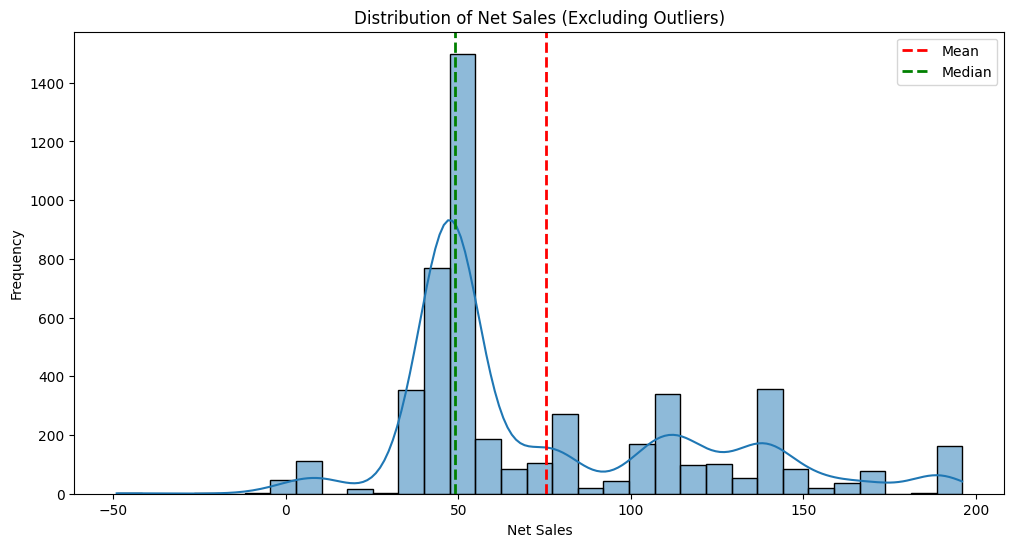

count    5022.000000
mean       75.296010
std        43.558146
min       -49.000000
25%        46.550000
50%        49.000000
75%       111.200000
max       196.000000
Name: net_sales, dtype: float64

Skewness: 0.94322646469939


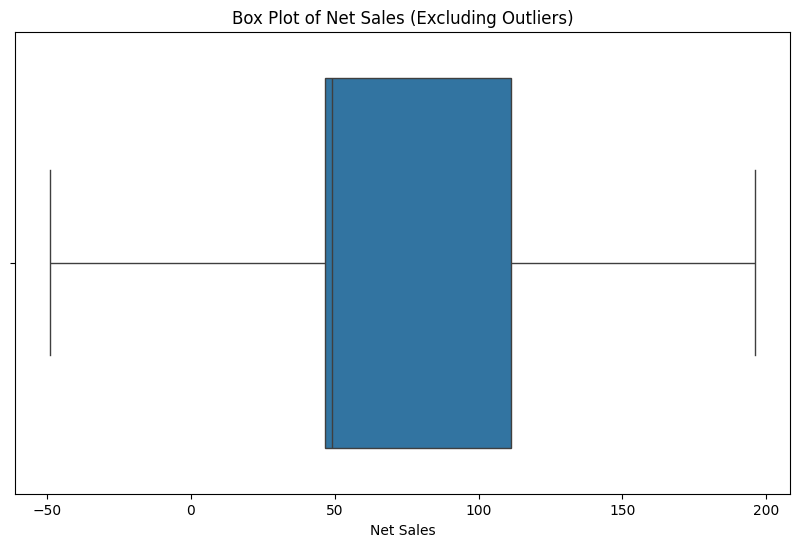


Percentage of data points removed as outliers: 2.58%


In [146]:
# Calculate IQR and define outlier boundaries
Q1 = newc['net_sales'].quantile(0.25)
Q3 = newc['net_sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
newc_filtered = newc[(newc['net_sales'] >= lower_bound) & (newc['net_sales'] <= upper_bound)]

# Plot distribution of net_sales without outliers
plt.figure(figsize=(12, 6))
sns.histplot(newc_filtered['net_sales'], kde=True)
plt.title('Distribution of Net Sales (Excluding Outliers)')
plt.xlabel('Net Sales')
plt.ylabel('Frequency')
plt.axvline(newc_filtered['net_sales'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(newc_filtered['net_sales'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.show()

# Display summary statistics of filtered data
print(newc_filtered['net_sales'].describe())

# Check for skewness of filtered data
print(f"\nSkewness: {newc_filtered['net_sales'].skew()}")

# Plot box plot to visualize distribution without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=newc_filtered['net_sales'])
plt.title('Box Plot of Net Sales (Excluding Outliers)')
plt.xlabel('Net Sales')
plt.show()

# Print the percentage of data points removed as outliers
outliers_removed = (len(newc) - len(newc_filtered)) / len(newc) * 100
print(f"\nPercentage of data points removed as outliers: {outliers_removed:.2f}%")


In [147]:
wys = dfs[dfs.product_title == 'Water Yourself']
wys.head()



,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,unit_price,discount_percentage,discount_rate,discount_round,year,month,day_of_month
771,2020-06-11,2496487391387,Concord,3671316299931,5280927514779,49.0,Water Yourself,NaN,34575556804763,NaN,White,Online Store,Concord,United States,One-time,No,No,paid,#1217,order,California,United States,First-time,2020-06,2020-04,https://us.search.yahoo.com/,us.search.yahoo.com,yahoo!,yahoo!,NaN,NaN,No,49.00,0.00,1,1,1,1,49.0,49.00,0.0,0.0,0.0,1,49.00,49.0,0.0,0.00,0.0,2020,6,11
774,2020-06-12,2498479358107,West Aliquippa,3673263702171,5280927514779,49.0,Water Yourself,NaN,34575556837531,NaN,Wood,Online Store,West Aliquippa,United States,One-time,No,No,paid,#1220,order,Pennsylvania,United States,Returning,2020-06,2020-04,https://app.icount.co.il/,app.icount.co.il,icount,icount,NaN,NaN,No,46.55,-2.45,1,1,1,1,49.0,46.55,0.0,0.0,0.0,1,46.55,49.0,5.0,0.05,5.0,2020,6,12
785,2020-06-13,2499836575899,Battle Ground,3674730037403,5280927514779,49.0,Water Yourself,NaN,34575556804763,NaN,White,Online Store,Battle Ground,United States,One-time,No,No,paid,#1223,order,Washington,United States,First-time,2020-06,2020-04,https://www.facebook.com/,www.facebook.com,facebook,meta,NaN,NaN,No,49.00,0.00,1,1,1,1,49.0,49.00,0.0,0.0,0.0,1,49.00,49.0,0.0,0.00,0.0,2020,6,13
788,2020-06-14,2501667291291,Bellingham,3676901015707,5280927514779,49.0,Water Yourself,NaN,34575556771995,NaN,Black,Online Store,Bellingham,United States,One-time,No,No,paid,#1229,order,Washington,United States,First-time,2020-06,2020-04,https://www.google.com,www.google.com,google,alphabet,NaN,NaN,No,49.00,0.00,1,1,1,1,49.0,49.00,0.0,0.0,0.0,1,49.00,49.0,0.0,0.00,0.0,2020,6,14
807,2020-06-16,2504264482971,Apo,6722191892,5280927514779,49.0,Water Yourself,NaN,34575556804763,NaN,White,Online Store,Apo,United States,One-time,No,No,paid,#1233,order,Armed Forces Europe,United States,Returning,2017-07,2017-07,https://www.jeanpierreweill.com/collections/mi...,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,49.00,0.00,1,1,1,1,49.0,49.00,0.0,0.0,0.0,1,49.00,49.0,0.0,0.00,0.0,2020,6,16


In [148]:
product_types = dfs.product_type.value_counts()
product_types

product_type
Mini               3635
Gift Collection    2255
Book Prints          72
Classique            53
Series               49
Grand                 8
Name: count, dtype: int64

<Axes: title={'center': 'Price Change for Mini'}, xlabel='day'>

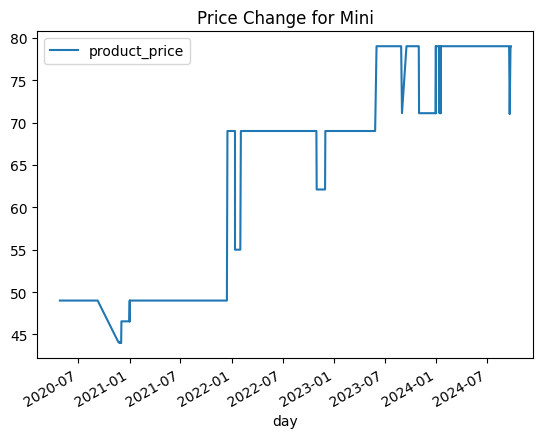

In [149]:
df[df.product_type == product_types.index[0]].plot(x='day', y='product_price', title='Price Change for {}'.format(product_types.index[0]))


<Axes: xlabel='day'>

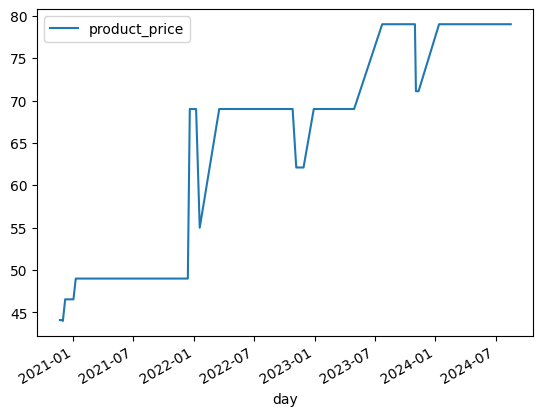

In [150]:
df[(df.product_type == product_types.index[0]) & (df.ordered_item_quantity > 1)].plot(x='day', y='product_price')


In [151]:
df[(df.product_type == product_types.index[1]) & (df.product_price < 500)].variant_sku.value_counts()


variant_sku
#000000-1    50
PCtreeoB     47
PCkotelB     34
PCwildfB     30
PCfeathB     30
             ..
PCeinstB      1
PCbirdcB      1
PCshapeB      1
PCjohnlC      1
PCfiddlC      1
Name: count, Length: 71, dtype: int64

In [152]:
df[(df.product_type == product_types.index[1]) & (df.product_price < 500)].variant_title.value_counts()

variant_title
Black                    1665
White                     173
Black / 10 x 8 inches     173
Cream                     125
Cream / 10 x 8 inches      20
Black Frame                17
Black / Holiday            12
Black / Regular            12
Black / Standard            4
Cream / Standard            3
White Frame                 2
Cream / Regular             2
Cream / Holiday             1
Name: count, dtype: int64

In [153]:
df[df.product_type == product_types.index[1]].product_price.value_counts()


product_price
139.00    864
189.00    279
114.00    258
104.25    201
159.00    163
111.20    138
151.20    126
169.00     97
127.00     45
126.75     38
120.00     27
739.00     17
100.00      2
Name: count, dtype: int64

<Axes: title={'center': 'Price Change for Gift Collection'}, xlabel='day'>

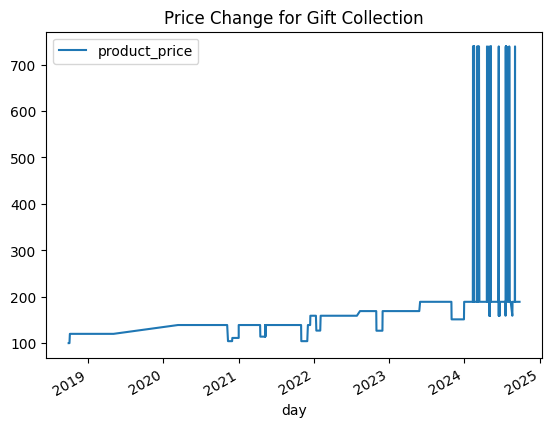

In [154]:
df[df.product_type == product_types.index[1]].plot(x='day', y='product_price', title='Price Change for {}'.format(product_types.index[1]))


<Axes: title={'center': 'Price Change Over Time'}, xlabel='day'>

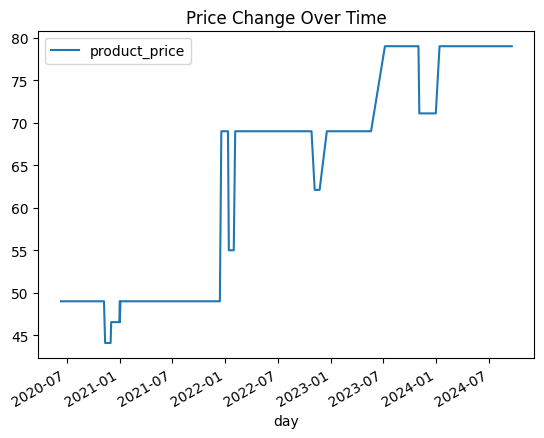

In [155]:
wys.plot(x='day', y='product_price', title='Price Change Over Time')


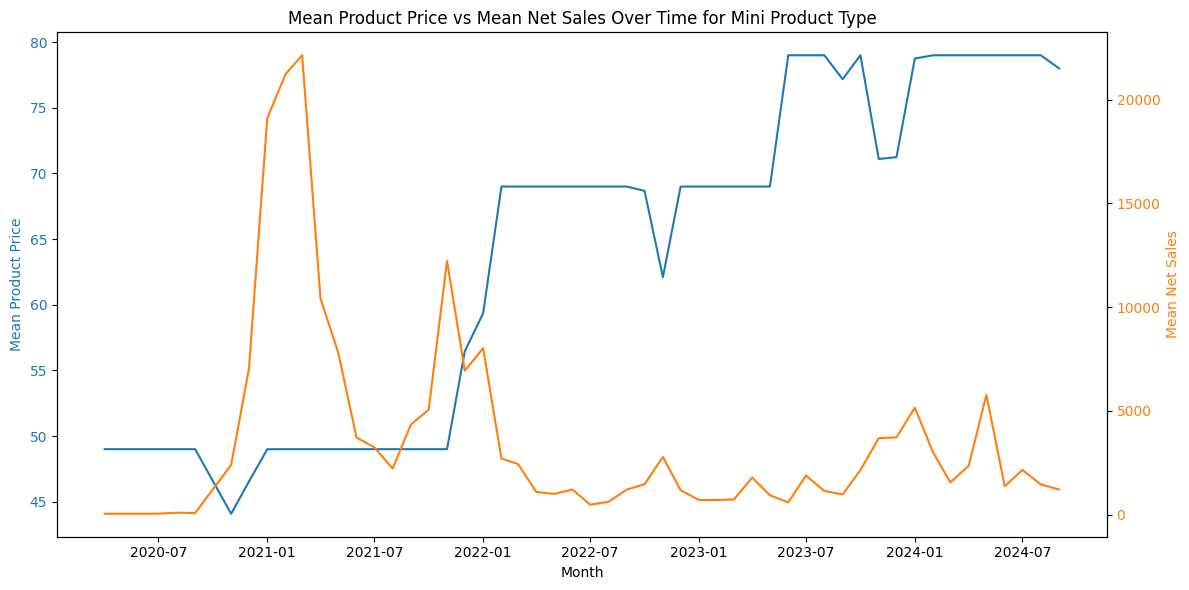

In [156]:
# Filter data for Mini product type
mini_data = df[df.product_type == 'Mini']

# Group by month and calculate mean product_price and mean net_sales
monthly_data = mini_data.groupby(mini_data['day'].dt.to_period('M')).agg({
    'product_price': 'mean',
    'net_sales': 'sum'
}).reset_index()

# Convert period to datetime for plotting
monthly_data['day'] = monthly_data['day'].dt.to_timestamp()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot mean product_price on the left y-axis
ax1.set_xlabel('Month')
ax1.set_ylabel('Mean Product Price', color='tab:blue')
ax1.plot(monthly_data['day'], monthly_data['product_price'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for mean net_sales
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Net Sales', color='tab:orange')
ax2.plot(monthly_data['day'], monthly_data['net_sales'], color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set title and display the plot
plt.title('Mean Product Price vs Mean Net Sales Over Time for Mini Product Type')
plt.tight_layout()
plt.show()


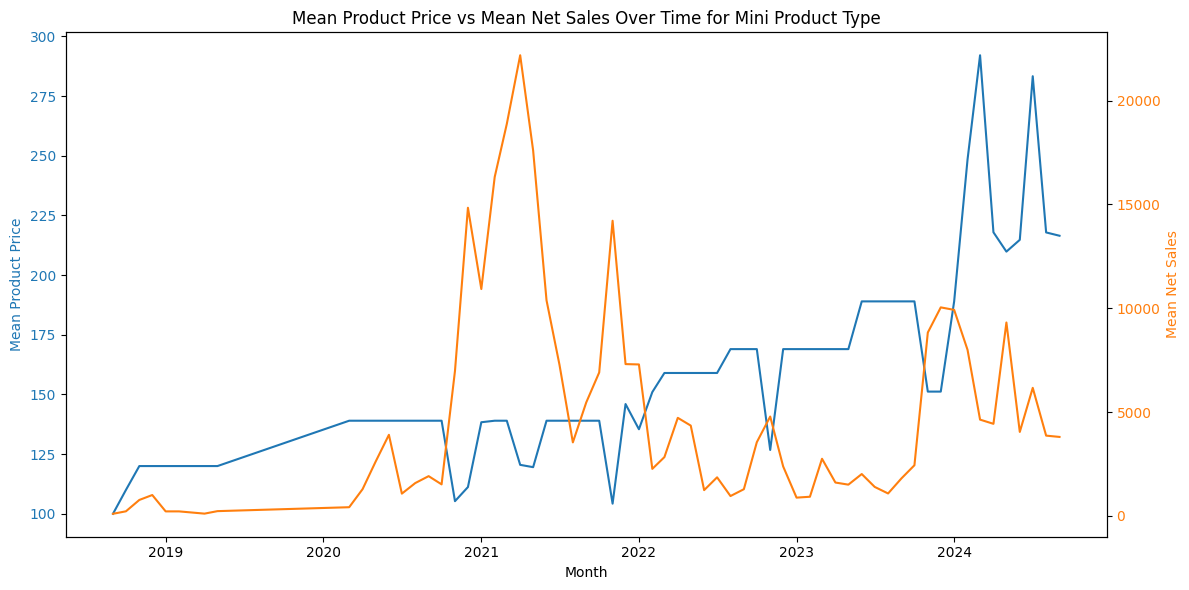

In [157]:
# Filter data for Mini product type
mini_data = df[df.product_type == 'Gift Collection']

# Group by month and calculate mean product_price and mean net_sales
monthly_data = mini_data.groupby(mini_data['day'].dt.to_period('M')).agg({
    'product_price': 'mean',
    'net_sales': 'sum'
}).reset_index()

# Convert period to datetime for plotting
monthly_data['day'] = monthly_data['day'].dt.to_timestamp()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot mean product_price on the left y-axis
ax1.set_xlabel('Month')
ax1.set_ylabel('Mean Product Price', color='tab:blue')
ax1.plot(monthly_data['day'], monthly_data['product_price'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for mean net_sales
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Net Sales', color='tab:orange')
ax2.plot(monthly_data['day'], monthly_data['net_sales'], color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set title and display the plot
plt.title('Mean Product Price vs Mean Net Sales Over Time for Mini Product Type')
plt.tight_layout()
plt.show()

In [158]:
df['price_discounted'] =(1 - df.discount_rate) * df.product_price

In [159]:
df.sample(10)

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,unit_price,discount_percentage,discount_rate,discount_round,year,month,day_of_month,price_discounted
2835,2020-12-31,2968483659931,Carlsbad,4427369250971,5280920141979,46.55,Bench,Mini,34575525183643,NaN,Black,Online Store,Carlsbad,United States,One-time,No,No,paid,#2092,order,California,United States,First-time,2020-12,2020-10,http://instagram.com/,instagram.com,instagram,meta,NaN,NaN,No,46.55,0.0,1,1,1,1,46.55,46.55,0.0,0.0,0.0,1,46.55,46.55,0.0,0.0,0.0,2020,12,31,46.55
8725,2021-11-14,4571561820390,Houston,5962225844454,5280931414171,49.00,Small Things,Mini,34575590981787,NaN,Black,Online Store,Houston,United States,One-time,No,No,paid,#4533,order,Texas,United States,First-time,2021-11,2021-10,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,49.00,0.0,1,1,1,1,49.00,49.00,0.0,0.0,0.0,1,49.00,49.00,0.0,0.0,0.0,2021,11,14,49.00
8457,2021-10-30,4527041085670,Sunnyside,5904797270246,6848885522587,10.00,Hand-written personalization inside your painting,NaN,40289823654043,NaN,NaN,Online Store,New York,United States,One-time,No,No,paid,#4441,order,New York,United States,First-time,2021-10,2021-10,NaN,NaN,direct,direct,NaN,NaN,No,10.00,0.0,1,1,1,1,10.00,10.00,0.0,0.0,0.0,1,10.00,10.00,0.0,0.0,0.0,2021,10,30,10.00
7077,2021-05-09,3819284627611,Camarillo,5225426780315,0,0.00,NaN,NaN,0,NaN,NaN,Online Store,North York,International,One-time,No,No,paid,#3856,order,California,United States,First-time,2021-05,2021-04,NaN,NaN,direct,direct,NaN,NaN,No,0.00,0.0,0,0,0,0,0.00,0.00,0.0,0.0,0.0,0,0.00,NaN,NaN,NaN,NaN,2021,5,9,NaN
4142,2021-02-08,3074819489947,Cumberland Foreside,4552285454491,0,0.00,NaN,NaN,0,NaN,NaN,Online Store,Cumberland Foreside,United States,One-time,No,No,paid,#2602,order,Maine,United States,First-time,2021-02,2021-01,https://www.google.com,www.google.com,google,alphabet,NaN,NaN,No,0.00,0.0,0,0,0,0,0.00,0.00,0.0,0.0,0.0,0,0.00,NaN,NaN,NaN,NaN,2021,2,8,NaN
13203,2024-07-23,5842308890854,St. Marienkirchen,8159806193894,0,0.00,NaN,NaN,0,NaN,NaN,Online Store,St. Marienkirchen Bei Schärding,International,One-time,No,No,paid,6181,order,NaN,Austria,First-time,2024-07,2024-07,https://www.jeanpierreweill.com/collections/pe...,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,0.00,0.0,0,0,0,0,0.00,0.00,0.0,0.0,0.0,0,0.00,NaN,NaN,NaN,NaN,2024,7,23,NaN
10431,2022-06-29,4831718015206,Ambler,3867205304475,0,0.00,NaN,NaN,0,NaN,NaN,Online Store,Ambler,United States,One-time,No,No,paid,5178,order,Pennsylvania,United States,Returning,2020-07,2020-07,https://www.bing.com/,www.bing.com,bing,microsoft,NaN,NaN,No,15.00,0.0,0,0,0,0,0.00,0.00,0.0,15.0,0.0,0,0.00,NaN,NaN,NaN,NaN,2022,6,29,NaN
5363,2021-03-15,3683584049307,Alliston,5072981885083,4826652835978,49.00,Whale,NaN,33259816648842,NaN,black,Online Store,Alliston,International,One-time,No,No,paid,#3092,order,Ontario,Canada,First-time,2021-03,2021-01,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,No,49.00,0.0,1,1,1,1,49.00,49.00,0.0,0.0,0.0,1,49.00,49.00,0.0,0.0,0.0,2021,3,15,49.00
1312,2020-11-13,2844337668251,North Haledon,3657601745051,5755818934427,104.25,Feathers,Gift Collection,36586571169947,NaN,Black,Online Store,North Haledon,United States,One-time,No,No,paid,#1427,order,New Jersey,United States,First-time,2020-11,2020-10,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,104.25,0.0,1,1,1,1,104.25,104.25,0.0,0.0,0.0,1,104.25,104.25,0.0,0.0,0.0,2020,11,13,104.25
9233,2021-12-05,460328

In [160]:
# Filter data for Mini product type
mini_data = df[df.product_type == 'Mini']

# Group by month and calculate mean product_price and mean net_sales
monthly_data = mini_data.groupby(mini_data['day'].dt.to_period('M')).agg({
    'price_discounted': 'mean',
    'product_price': 'mean',
    'net_sales': 'sum'
}).reset_index()

# Convert period to datetime for plotting
monthly_data['day'] = monthly_data['day'].dt.to_timestamp()

# Import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create the plot
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add trace for mean product price
fig.add_trace(
    go.Scatter(x=monthly_data['day'], y=monthly_data['price_discounted'], name="Mean Product Price"),
    secondary_y=False,
)

# Add trace for net sales
fig.add_trace(
    go.Scatter(x=monthly_data['day'], y=monthly_data['net_sales'], name="Net Sales"),
    secondary_y=True,
)

# Set x-axis title
fig.update_xaxes(title_text="Month")

# Set y-axes titles
fig.update_yaxes(title_text="Mean Product Price", secondary_y=False)
fig.update_yaxes(title_text="Net Sales", secondary_y=True)

# Set title
fig.update_layout(
    title_text="Mean Product Price vs Net Sales Over Time for Mini Product Type",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

# Show the plot
fig.show()

In [161]:
# Filter data for Gift Collection product type
gift_collection_data = df[df.product_type == 'Gift Collection']

# Group by month and calculate mean product_price and mean net_sales
monthly_data = gift_collection_data.groupby(gift_collection_data['day'].dt.to_period('M')).agg({
    'price_discounted': 'mean',
    'product_price': 'mean',
    'net_sales': 'sum'
}).reset_index()

# Convert period to datetime for plotting
monthly_data['day'] = monthly_data['day'].dt.to_timestamp()

# Import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create the plot
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add trace for mean product price
fig.add_trace(
    go.Scatter(x=monthly_data['day'], y=monthly_data['price_discounted'], name="Mean Product Price"),
    secondary_y=False,
)


# Add trace for net sales
fig.add_trace(
    go.Scatter(x=monthly_data['day'], y=monthly_data['net_sales'], name="Net Sales"),
    secondary_y=True,
)

# Set x-axis title
fig.update_xaxes(title_text="Month")

# Set y-axes titles
fig.update_yaxes(title_text="Mean Product Price", secondary_y=False)
fig.update_yaxes(title_text="Net Sales", secondary_y=True)

# Set title
fig.update_layout(
    title_text="Mean Product Price vs Net Sales Over Time for Gift Collection Product Type",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

# Show the plot
fig.show()

In [162]:
# Filter data for Gift Collection product type
gift_collection_data = df[df.product_type == 'Series']

# Group by month and calculate mean product_price and mean net_sales
monthly_data = gift_collection_data.groupby(gift_collection_data['day'].dt.to_period('M')).agg({
    'price_discounted': 'mean',
    'net_sales': 'sum'
}).reset_index()

# Convert period to datetime for plotting
monthly_data['day'] = monthly_data['day'].dt.to_timestamp()

# Import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create the plot
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add trace for mean product price
fig.add_trace(
    go.Scatter(x=monthly_data['day'], y=monthly_data['price_discounted'], name="Mean Product Price"),
    secondary_y=False,
)

# Add trace for net sales
fig.add_trace(
    go.Scatter(x=monthly_data['day'], y=monthly_data['net_sales'], name="Net Sales"),
    secondary_y=True,
)

# Set x-axis title
fig.update_xaxes(title_text="Month")

# Set y-axes titles
fig.update_yaxes(title_text="Mean Product Price", secondary_y=False)
fig.update_yaxes(title_text="Net Sales", secondary_y=True)

# Set title
fig.update_layout(
    title_text="Mean Product Price vs Net Sales Over Time for Gift Collection Product Type",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

# Show the plot
fig.show()

In [163]:
product_types = ['Mini', 'Gift Collection', 'Grand']
filtered_df = df[df.product_type.isin(product_types)]

# Group by month and product type, calculate mean discounted price and sum of net sales
monthly_data = filtered_df.groupby([filtered_df['day'].dt.to_period('M'), 'product_type']).agg({
    'price_discounted': 'mean',
    'product_price': 'mean',
    'net_sales': 'sum'
}).reset_index()

C:\Users\Vlad\AppData\Local\Temp\ipykernel_9456\1459823086.py:18: UserWarning:

Ignoring `ax`; jointplot is a figure-level function.

C:\Users\Vlad\AppData\Local\Temp\ipykernel_9456\1459823086.py:18: UserWarning:

Ignoring `ax`; jointplot is a figure-level function.

C:\Users\Vlad\AppData\Local\Temp\ipykernel_9456\1459823086.py:18: UserWarning:

Ignoring `ax`; jointplot is a figure-level function.



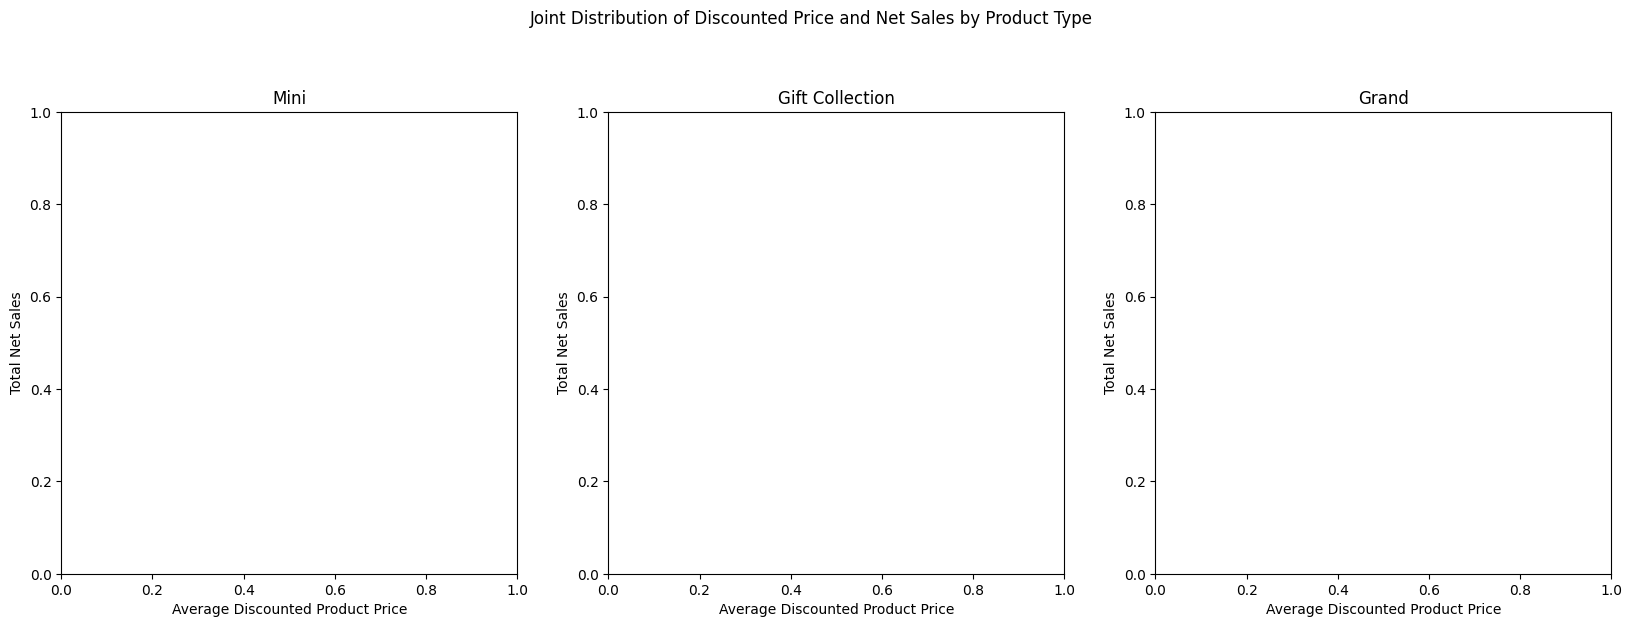

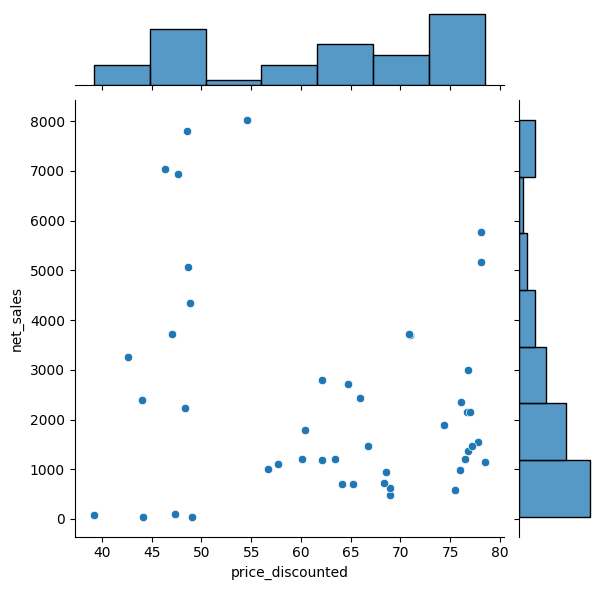

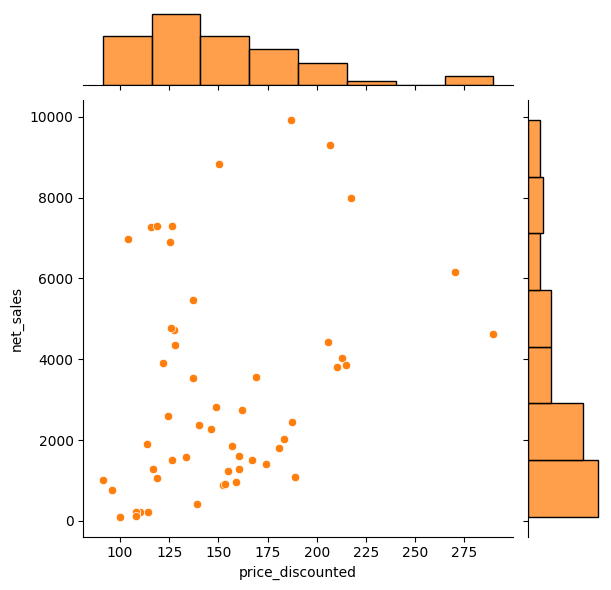

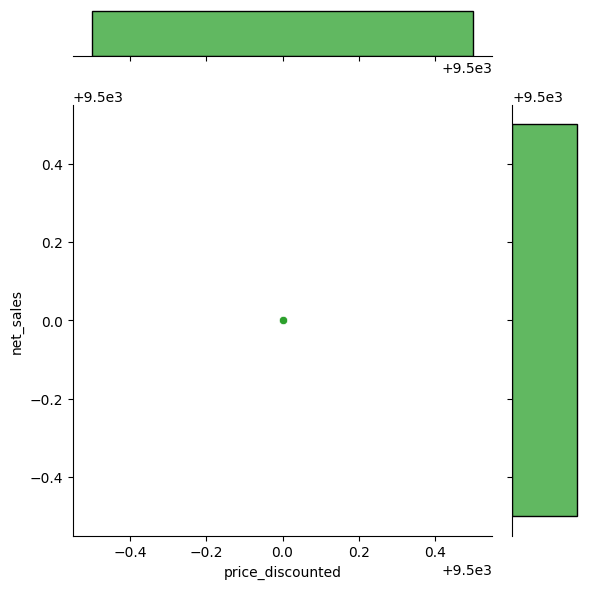

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
# Filter data for specified product types


# Convert period to datetime for plotting
monthly_data['day'] = monthly_data['day'].dt.to_timestamp()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Joint Distribution of Discounted Price and Net Sales by Product Type", y=1.05)

for i, product_type in enumerate(product_types):
    data = monthly_data[(monthly_data['product_type'] == product_type)
                        & (monthly_data['net_sales'] < 10000)]
    
    # Create joint plot for each product type
    sns.jointplot(
        data=data,
        x="price_discounted",
        y="net_sales",
        kind="scatter",
        height=6,
        ratio=5,
        color=sns.color_palette()[i],
        ax=axes[i]
    )
    
    # Customize each subplot
    axes[i].set_title(product_type)
    axes[i].set_xlabel("Average Discounted Product Price")
    axes[i].set_ylabel("Total Net Sales")

# Adjust layout
plt.tight_layout()
plt.show()


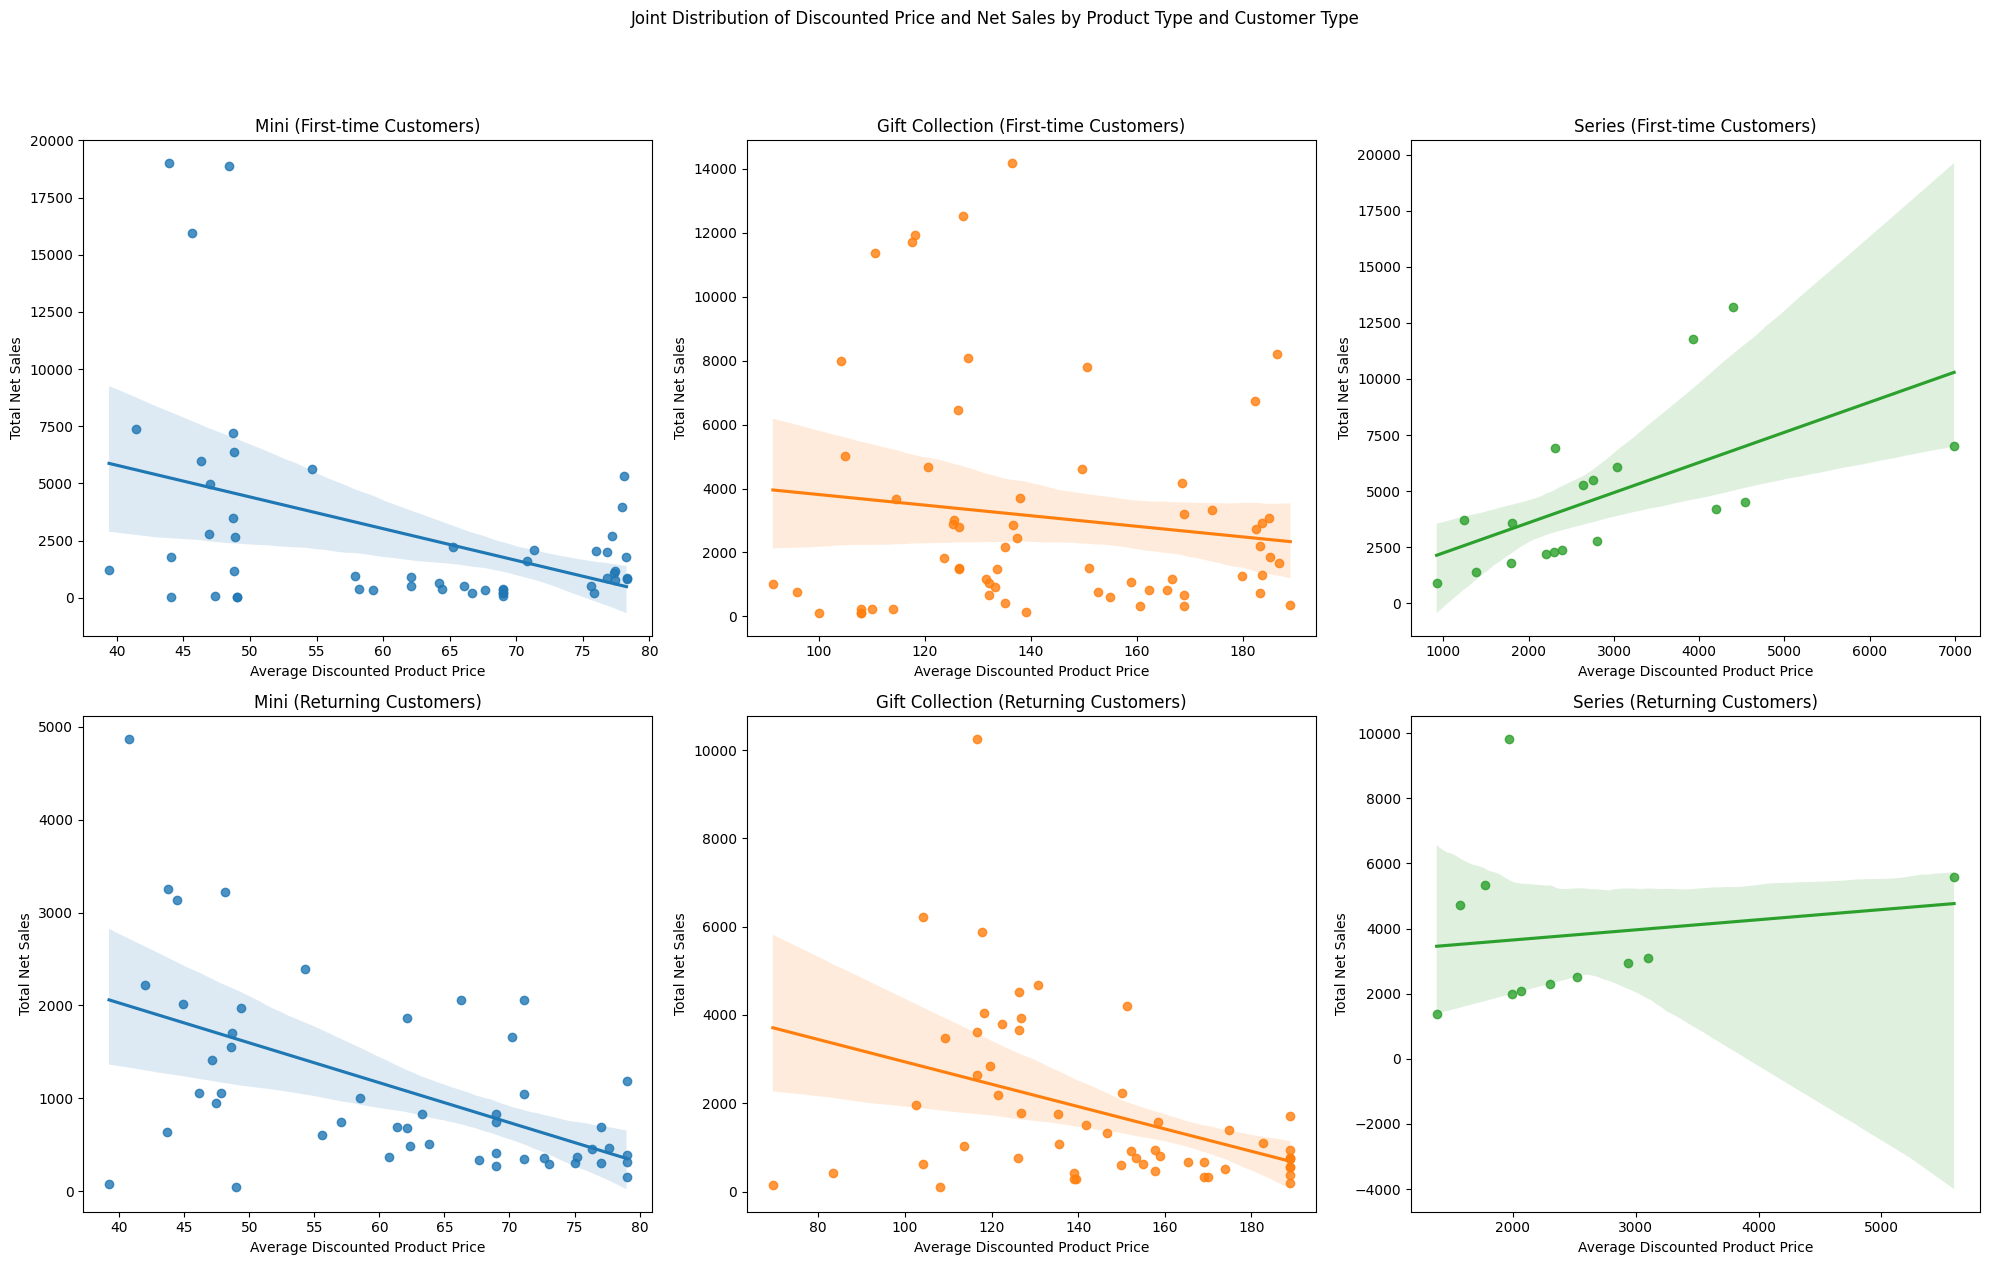

In [174]:
product_types = ['Mini', 'Gift Collection', 'Series']
customer_types = ['First-time', 'Returning']

filtered_df = df[df.product_type.isin(product_types) & ~((df.product_type == 'Gift Collection') & (df.product_price > 500))]

# Create figure
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle("Joint Distribution of Discounted Price and Net Sales by Product Type and Customer Type", y=1.05)

for j, customer_type in enumerate(customer_types):
    # Filter data for current customer type
    customer_df = filtered_df[filtered_df.customer_type == customer_type]
    
    # Group by month and product type, calculate mean discounted price and sum of net sales
    monthly_data = customer_df.groupby([customer_df['day'].dt.to_period('M'), 'product_type']).agg({
        'price_discounted': 'mean',
        'product_price': 'mean',
        'net_sales': 'sum'
    }).reset_index()

    # Convert period to datetime for plotting
    monthly_data['day'] = monthly_data['day'].dt.to_timestamp()

    for i, product_type in enumerate(product_types):
        data = monthly_data[(monthly_data['product_type'] == product_type)
                            ]
        
        # Create regplot for each product type and customer type
        sns.regplot(
            data=data,
            x="price_discounted",
            y="net_sales",
            scatter=True,
            fit_reg=True,
            color=sns.color_palette()[i],
            ax=axes[j, i]
        )
        
        # Customize each subplot
        axes[j, i].set_title(f"{product_type} ({customer_type} Customers)")
        axes[j, i].set_xlabel("Average Discounted Product Price")
        axes[j, i].set_ylabel("Total Net Sales")

# Adjust layout
plt.tight_layout()
plt.show()

Pearson's correlation between monthly net sales and average discounted price:
      Product Type Customer Type  Correlation   P-value
0             Mini    First-time    -0.413025  0.002594
1             Mini     Returning    -0.542838  0.000056
2  Gift Collection    First-time    -0.133649  0.296366
3  Gift Collection     Returning    -0.398071  0.002614
4           Series    First-time     0.591976  0.009648
5           Series     Returning     0.147830  0.664453


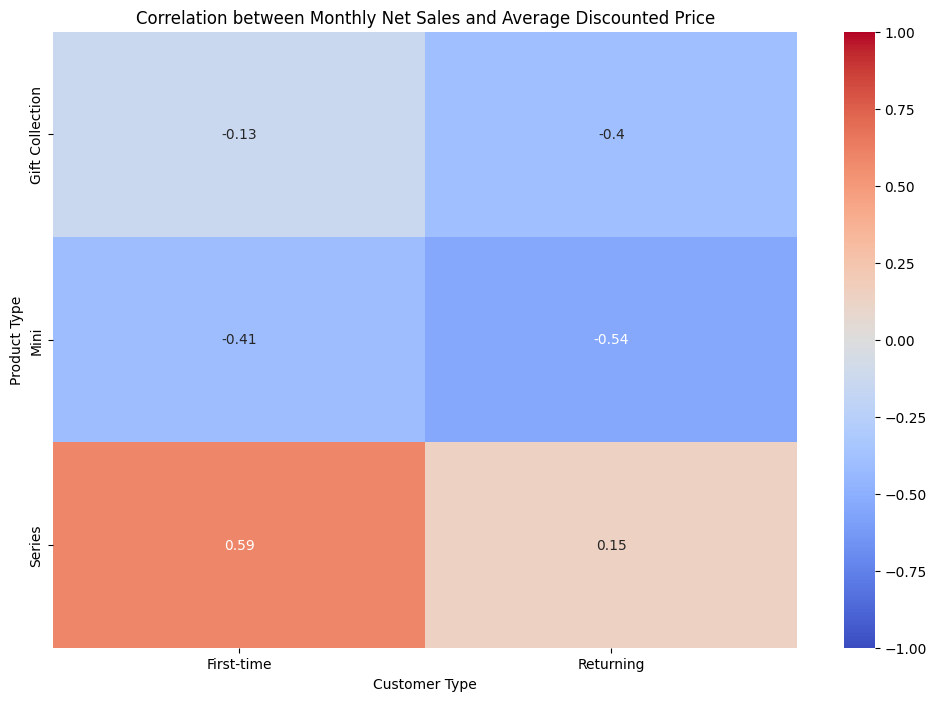

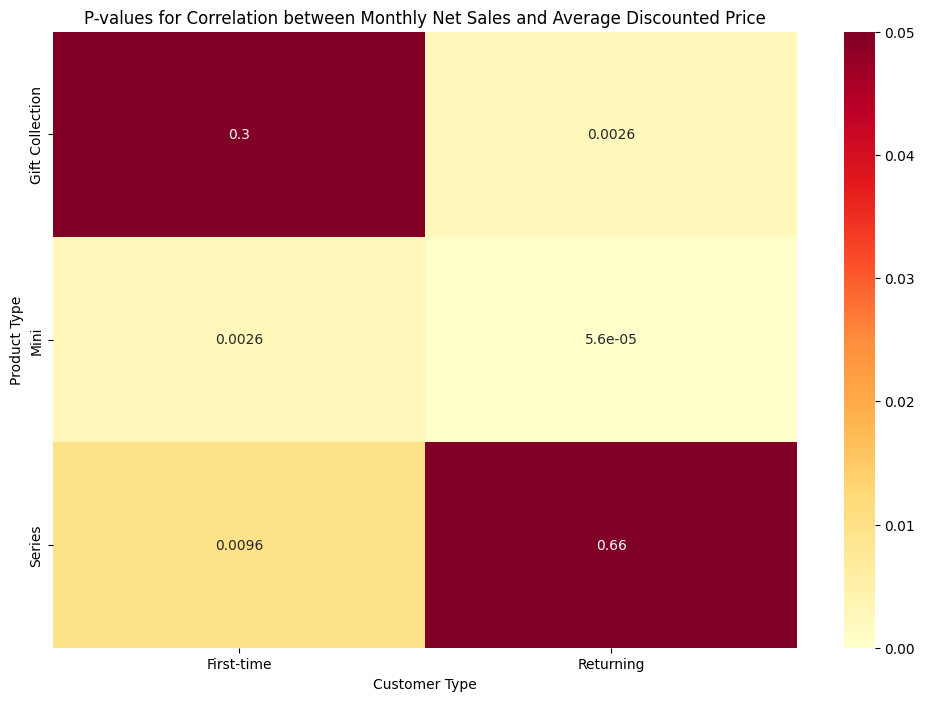

In [181]:
from scipy import stats

# Aggregate data by month, product type, and customer type
monthly_data = filtered_df.groupby([filtered_df['day'].dt.to_period('M'), 'product_type', 'customer_type']).agg({
    'net_sales': 'sum',
    'price_discounted': 'mean'
}).reset_index()

# Calculate Pearson's correlation and p-value between net sales and product price for each product type and customer type
correlations = []

for product_type in product_types:
    for customer_type in customer_types:
        # Filter data for current product type and customer type
        subset = monthly_data[(monthly_data['product_type'] == product_type) & 
                              (monthly_data['customer_type'] == customer_type)]
        
        # Calculate correlation and p-value
        correlation, p_value = stats.pearsonr(subset['net_sales'], subset['price_discounted'])
        
        correlations.append({
            'Product Type': product_type,
            'Customer Type': customer_type,
            'Correlation': correlation,
            'P-value': p_value
        })

# Create a DataFrame from the results
correlation_df = pd.DataFrame(correlations)

# Display the results
print("Pearson's correlation between monthly net sales and average discounted price:")
print(correlation_df)

# Create a heatmap of the correlations
plt.figure(figsize=(12, 8))
correlation_pivot = correlation_df.pivot(index='Product Type', columns='Customer Type', values='Correlation')
sns.heatmap(correlation_pivot, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Correlation between Monthly Net Sales and Average Discounted Price")
plt.show()

# Create a heatmap of the p-values
plt.figure(figsize=(12, 8))
p_value_pivot = correlation_df.pivot(index='Product Type', columns='Customer Type', values='P-value')
sns.heatmap(p_value_pivot, annot=True, cmap='YlOrRd', vmin=0, vmax=0.05)
plt.title("P-values for Correlation between Monthly Net Sales and Average Discounted Price")
plt.show()


C:\Users\Vlad\AppData\Local\Temp\ipykernel_9456\485878011.py:23: UserWarning:

Ignoring `ax`; jointplot is a figure-level function.

C:\Users\Vlad\AppData\Local\Temp\ipykernel_9456\485878011.py:23: UserWarning:

Ignoring `ax`; jointplot is a figure-level function.

C:\Users\Vlad\AppData\Local\Temp\ipykernel_9456\485878011.py:23: UserWarning:

Ignoring `ax`; jointplot is a figure-level function.



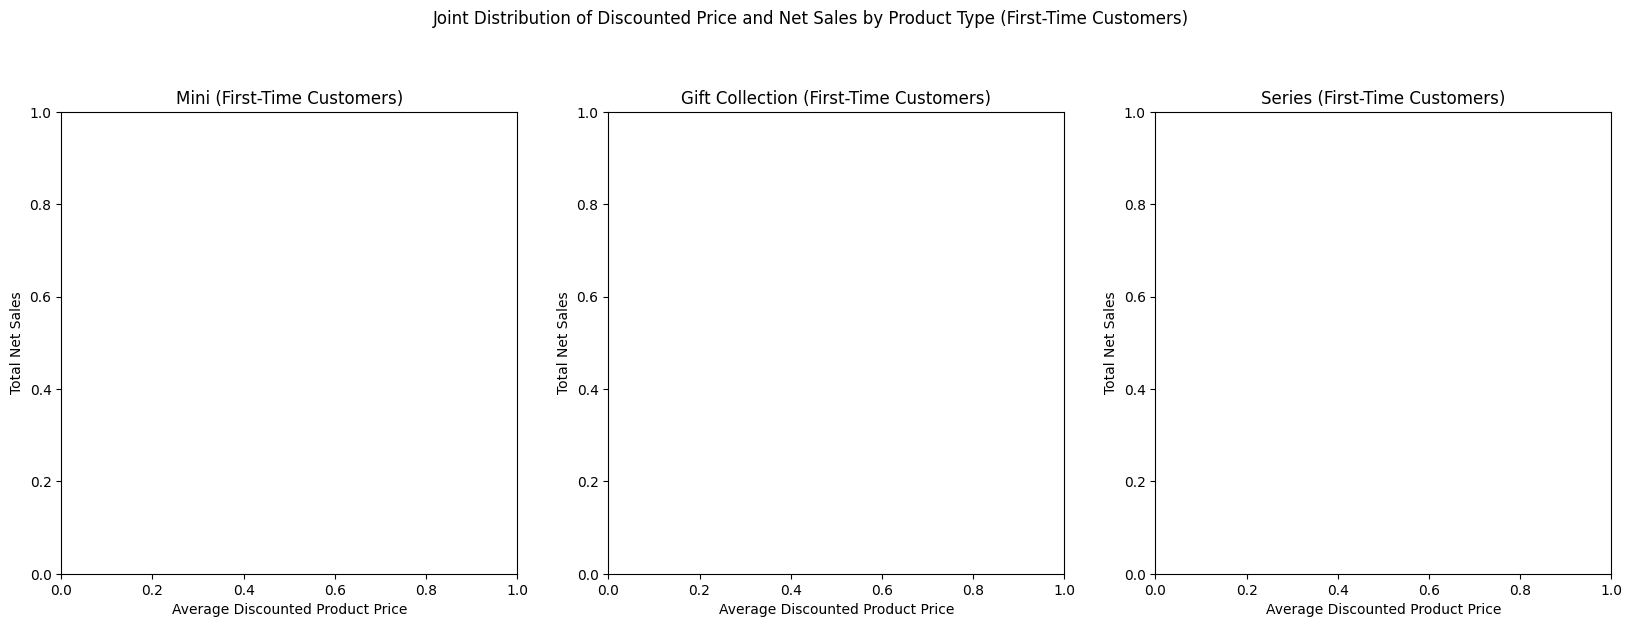

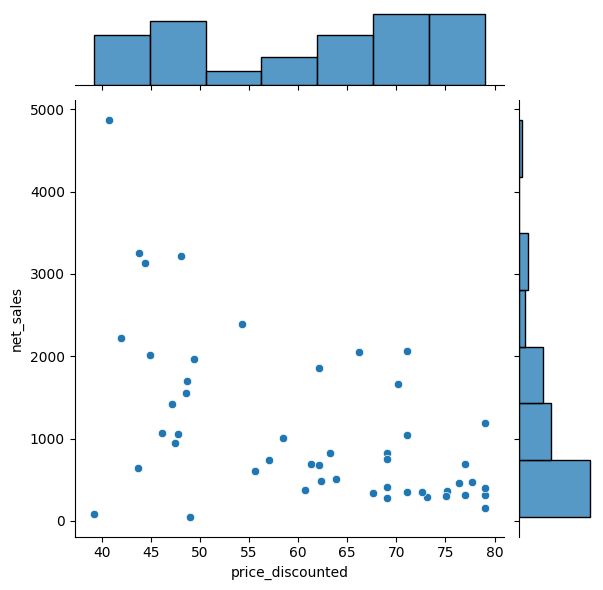

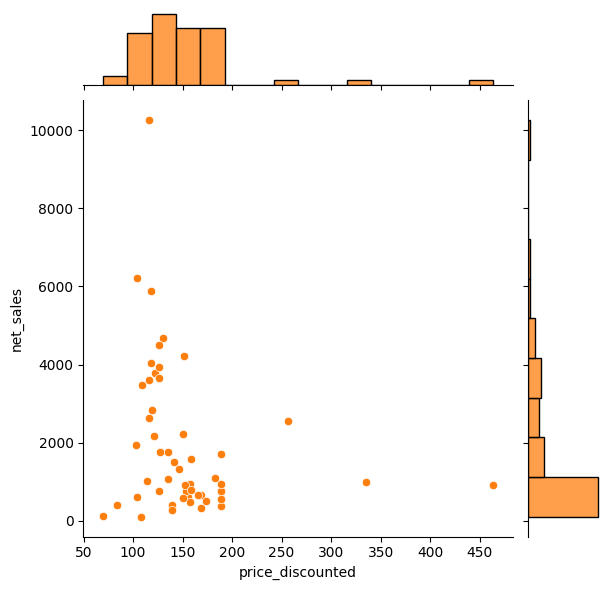

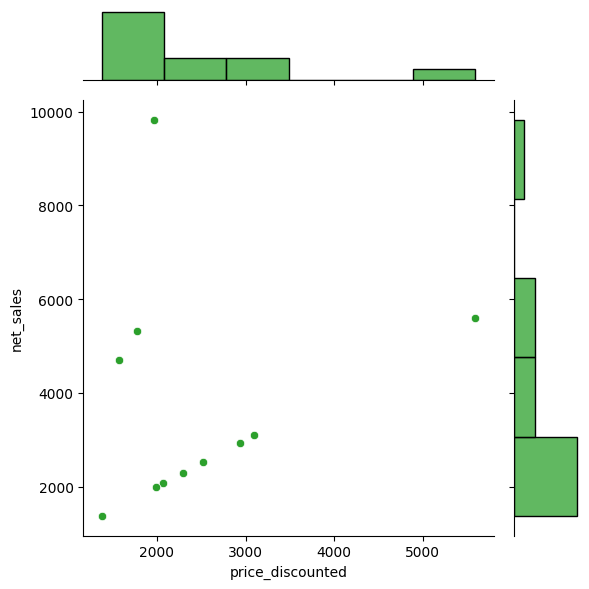

In [168]:
product_types = ['Mini', 'Gift Collection', 'Series']
filtered_df = df[df.product_type.isin(product_types) & (df.customer_type == 'Returning')]

# Group by month and product type, calculate mean discounted price and sum of net sales
monthly_first_time_data = filtered_df.groupby([filtered_df['day'].dt.to_period('M'), 'product_type']).agg({
    'price_discounted': 'mean',
    'product_price': 'mean',
    'net_sales': 'sum'
}).reset_index()

# Convert period to datetime for plotting
monthly_first_time_data['day'] = monthly_first_time_data['day'].dt.to_timestamp()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Joint Distribution of Discounted Price and Net Sales by Product Type (First-Time Customers)", y=1.05)

for i, product_type in enumerate(product_types):
    data = monthly_first_time_data[(monthly_first_time_data['product_type'] == product_type)
                                   & (monthly_first_time_data['net_sales'] < 20000)]
    
    # Create joint plot for each product type
    sns.jointplot(
        data=data,
        x="price_discounted",
        y="net_sales",
        kind="scatter",
        height=6,
        ratio=5,
        color=sns.color_palette()[i],
        ax=axes[i]
    )
    
    # Customize each subplot
    axes[i].set_title(f"{product_type} (First-Time Customers)")
    axes[i].set_xlabel("Average Discounted Product Price")
    axes[i].set_ylabel("Total Net Sales")

# Adjust layout
plt.tight_layout()
plt.show()